In [1]:
%matplotlib notebook

%load_ext autoreload
%autoreload 2

In [2]:
import cytoflow as flow

In [3]:
tube1 = flow.Tube(file='../../cytoflow/tests/data/Plate01/RFP_Well_A3.fcs',
                  conditions = {"Dox" : 10.0})

tube2 = flow.Tube(file='../../cytoflow/tests/data/Plate01/CFP_Well_A4.fcs',
                  conditions = {"Dox" : 1.0})

import_op = flow.ImportOp(conditions = {"Dox" : "log"},
                          tubes = [tube1, tube2])

ex = import_op.apply()

In [4]:
logicle = flow.LogicleTransformOp()
logicle.name = "Logicle transformation"
logicle.channels = ['V2-A', 'Y2-A', 'B1-A']
logicle.estimate(ex)
ex2 = logicle.apply(ex)

<IPython.core.display.Javascript object>


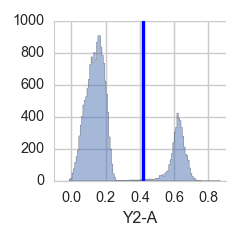

In [5]:
t = flow.ThresholdOp(name = "Threshold",
                     channel = "Y2-A")
tv = t.default_view()
tv.plot(ex2)
tv.interactive = True

In [6]:
t.threshold

0.41719118708390435

<IPython.core.display.Javascript object>


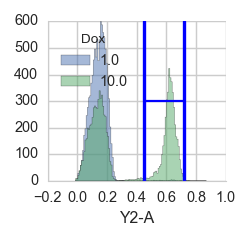

In [7]:
r = flow.RangeOp(name = "Range",
                 channel = "Y2-A")
rv = r.default_view()
rv.huefacet = "Dox"
rv.plot(ex2)
rv.interactive = True

In [8]:
print r.low, r.high

0.451876698635 0.716160850957


<IPython.core.display.Javascript object>


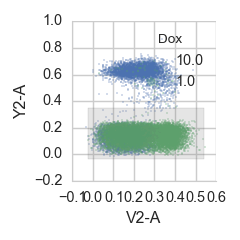

In [9]:
r2d = flow.Range2DOp(name = "Range2D",
                     xchannel = "V2-A",
                     ychannel = "Y2-A")
r2dv = r2d.default_view()
r2dv.huefacet = "Dox"
r2dv.plot(ex2)
r2dv.interactive = True

In [10]:
print r2d.xlow, r2d.xhigh, r2d.ylow, r2d.yhigh

-0.0226309672483 0.540089657612 -0.0347837442541 0.34883514417


<IPython.core.display.Javascript object>


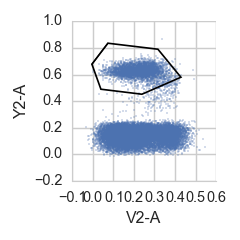

In [11]:
p = flow.PolygonOp(name = "Polygon",
                   xchannel = "V2-A",
                   ychannel = "Y2-A")
pv = p.default_view()
pv.plot(ex2)
pv.interactive = True

In [12]:
print p.vertices

[(0.31694182361561274, 0.79074905975762655), (0.42851574061374309, 0.58013476807354802), (0.23932518570386996, 0.45226180526535731), (0.040432551055028965, 0.48987150020894288), (-0.0032268077703263565, 0.67791997492687028), (0.074389830141416424, 0.83588069368992923)]
